# Part 1 - Macho merging
* Merge the 4 csv files into one dataframe
* rename Wins, Losses, and Draws columns with `years` in columns name

# Part 2
* Fill missing values with 0

* Add Total Wins, Total Losses, Total Draws, and Total Matches columns

* Find wrestlers that have wrestled > 100 matches and won a match in both 2013 and 2016

# Part 3 - Charting
* Create a variable and an input that asks the user what wrestler they would like to look for.

* Store an individual wrestler's wins over time in a variable

* Store that same wrestler's losses over time in a variable as well

* Create a line chart that will plot this wrestler's wins and losses from 2013 to 2016


In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce

# Part 1 - Macho merging
* Merge the 4 csv files into one dataframe
* rename Wins, Losses, and Draws columns with `years` in columns name


In [2]:
filenames = os.listdir("../Resources/")
print(filenames)
filenames = [
    os.path.join("..", "Resources", f)
    for f in filenames
]
filenames

['WWE-Data-2013.csv', 'WWE-Data-2014.csv', 'WWE-Data-2015.csv', 'WWE-Data-2016.csv']


['../Resources/WWE-Data-2013.csv',
 '../Resources/WWE-Data-2014.csv',
 '../Resources/WWE-Data-2015.csv',
 '../Resources/WWE-Data-2016.csv']

In [3]:
dfs = [
    pd.read_csv(f)
    for f in filenames
]
print(f"There are {len(dfs)} dataframes")
dfs[0].head()

There are 4 dataframes


,Wrestler,Wins,Losses,Draws
0,Daniel Bryan,177,37,6
1,Dean Ambrose,70,134,4
2,Antonio Cesaro,80,126,1
3,Seth Rollins,50,150,4
4,Randy Orton,129,63,8


In [4]:
def get_year(filename):
    year = filename.split("-")[-1] # last element
    year = year.split(".")[0] # removes .csv
    return year
get_year(filenames[0])

'2013'

In [5]:
# good idea to rename columns as soon as possible
def get_wrestler_data(filename):
    df = pd.read_csv(filename)
    year = get_year(filename)
    df = df.rename(columns = {
        "Wins": f"{year} Wins",
        "Losses": f"{year} Losses",
        "Draws": f"{year} Draws"
    })
    return df

dfs = [
    get_wrestler_data(f)
    for f in filenames
]
dfs[0].head()

,Wrestler,2013 Wins,2013 Losses,2013 Draws
0,Daniel Bryan,177,37,6
1,Dean Ambrose,70,134,4
2,Antonio Cesaro,80,126,1
3,Seth Rollins,50,150,4
4,Randy Orton,129,63,8


In [6]:
# merge 2 dataframes at a time
def merge(df1, df2):
    return df1.merge(df2, how="outer", on="Wrestler")

df = reduce(merge, dfs)
df.head()

,Wrestler,2013 Wins,2013 Losses,2013 Draws,2014 Wins,2014 Losses,2014 Draws,2015 Wins,2015 Losses,2015 Draws,2016 Wins,2016 Losses,2016 Draws
0,Daniel Bryan,177.0,37.0,6.0,35.0,16.0,2.0,51.0,7.0,0.0,NaN,NaN,NaN
1,Dean Ambrose,70.0,134.0,4.0,129.0,36.0,2.0,150.0,63.0,5.0,133.0,67.0,4.0
2,Antonio Cesaro,80.0,126.0,1.0,5.0,24.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,Seth Rollins,50.0,150.0,4.0,87.0,105.0,4.0,51.0,124.0,1.0,39.0,75.0,4.0
4,Randy Orton,129.0,63.0,8.0,33.0,87.0,5.0,81.0,10.0,1.0,39.0,21.0,0.0


# Part 2
* Fill missing values with 0

* Add Total Wins, Total Losses, Total Draws, and Total Matches columns

* Find wrestlers that have wrestled > 100 matches and won a match in both 2013 and 2016


In [7]:
df = df.fillna(0)
df = df.set_index("Wrestler")
df.head()

,2013 Wins,2013 Losses,2013 Draws,2014 Wins,2014 Losses,2014 Draws,2015 Wins,2015 Losses,2015 Draws,2016 Wins,2016 Losses,2016 Draws
Wrestler,,,,,,,,,,,,
Daniel Bryan,177.0,37.0,6.0,35.0,16.0,2.0,51.0,7.0,0.0,0.0,0.0,0.0
Dean Ambrose,70.0,134.0,4.0,129.0,36.0,2.0,150.0,63.0,5.0,133.0,67.0,4.0
Antonio Cesaro,80.0,126.0,1.0,5.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Seth Rollins,50.0,150.0,4.0,87.0,105.0,4.0,51.0,124.0,1.0,39.0,75.0,4.0
Randy Orton,129.0,63.0,8.0,33.0,87.0,5.0,81.0,10.0,1.0,39.0,21.0,0.0


In [8]:
wins_columns = df.columns[df.columns.str.contains("Wins")]
losses_columns = df.columns[df.columns.str.contains("Losses")]
draws_columns = df.columns[df.columns.str.contains("Draws")]
print(wins_columns)
print(losses_columns)
print(draws_columns)

Index(['2013 Wins', '2014 Wins', '2015 Wins', '2016 Wins'], dtype='object')
Index(['2013 Losses', '2014 Losses', '2015 Losses', '2016 Losses'], dtype='object')
Index(['2013 Draws', '2014 Draws', '2015 Draws', '2016 Draws'], dtype='object')


In [9]:
df["Total Wins"] = df[wins_columns].sum(axis=1)
df["Total Losses"] = df[losses_columns].sum(axis=1)
df["Total Draws"] = df[draws_columns].sum(axis=1)
df.head()

,2013 Wins,2013 Losses,2013 Draws,2014 Wins,2014 Losses,2014 Draws,2015 Wins,2015 Losses,2015 Draws,2016 Wins,2016 Losses,2016 Draws,Total Wins,Total Losses,Total Draws
Wrestler,,,,,,,,,,,,,,,
Daniel Bryan,177.0,37.0,6.0,35.0,16.0,2.0,51.0,7.0,0.0,0.0,0.0,0.0,263.0,60.0,8.0
Dean Ambrose,70.0,134.0,4.0,129.0,36.0,2.0,150.0,63.0,5.0,133.0,67.0,4.0,482.0,300.0,15.0
Antonio Cesaro,80.0,126.0,1.0,5.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,85.0,150.0,1.0
Seth Rollins,50.0,150.0,4.0,87.0,105.0,4.0,51.0,124.0,1.0,39.0,75.0,4.0,227.0,454.0,13.0
Randy Orton,129.0,63.0,8.0,33.0,87.0,5.0,81.0,10.0,1.0,39.0,21.0,0.0,282.0,181.0,14.0


In [10]:
df["Total Matches"] = df[["Total Wins", "Total Losses", "Total Draws"]].sum(axis=1)
df.head()

,2013 Wins,2013 Losses,2013 Draws,2014 Wins,2014 Losses,2014 Draws,2015 Wins,2015 Losses,2015 Draws,2016 Wins,2016 Losses,2016 Draws,Total Wins,Total Losses,Total Draws,Total Matches
Wrestler,,,,,,,,,,,,,,,,
Daniel Bryan,177.0,37.0,6.0,35.0,16.0,2.0,51.0,7.0,0.0,0.0,0.0,0.0,263.0,60.0,8.0,331.0
Dean Ambrose,70.0,134.0,4.0,129.0,36.0,2.0,150.0,63.0,5.0,133.0,67.0,4.0,482.0,300.0,15.0,797.0
Antonio Cesaro,80.0,126.0,1.0,5.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,85.0,150.0,1.0,236.0
Seth Rollins,50.0,150.0,4.0,87.0,105.0,4.0,51.0,124.0,1.0,39.0,75.0,4.0,227.0,454.0,13.0,694.0
Randy Orton,129.0,63.0,8.0,33.0,87.0,5.0,81.0,10.0,1.0,39.0,21.0,0.0,282.0,181.0,14.0,477.0


In [11]:
cond = (df["Total Matches"]>0) & (df["2013 Wins"]>0) & (df["2016 Wins"]>0)
df[cond].head()

,2013 Wins,2013 Losses,2013 Draws,2014 Wins,2014 Losses,2014 Draws,2015 Wins,2015 Losses,2015 Draws,2016 Wins,2016 Losses,2016 Draws,Total Wins,Total Losses,Total Draws,Total Matches
Wrestler,,,,,,,,,,,,,,,,
Dean Ambrose,70.0,134.0,4.0,129.0,36.0,2.0,150.0,63.0,5.0,133.0,67.0,4.0,482.0,300.0,15.0,797.0
Seth Rollins,50.0,150.0,4.0,87.0,105.0,4.0,51.0,124.0,1.0,39.0,75.0,4.0,227.0,454.0,13.0,694.0
Randy Orton,129.0,63.0,8.0,33.0,87.0,5.0,81.0,10.0,1.0,39.0,21.0,0.0,282.0,181.0,14.0,477.0
Roman Reigns,49.0,140.0,5.0,118.0,28.0,4.0,187.0,19.0,7.0,142.0,12.0,5.0,496.0,199.0,21.0,716.0
Ryback,103.0,88.0,3.0,43.0,114.0,1.0,138.0,34.0,2.0,37.0,17.0,1.0,321.0,253.0,7.0,581.0


# Part 3 - Charting
* Create a variable and an input that asks the user what wrestler they would like to look for.

* Store an individual wrestler's wins over time in a variable

* Store that same wrestler's losses over time in a variable as well

* Create a line chart that will plot this wrestler's wins and losses from 2013 to 2016


In [12]:
wrestler = input("What wrestler's career would you like to look at?")

What wrestler's career would you like to look at?Ryback


In [13]:
df.loc[wrestler, wins_columns]

2013 Wins    103.0
2014 Wins     43.0
2015 Wins    138.0
2016 Wins     37.0
Name: Ryback, dtype: float64

In [14]:
df.loc[wrestler, losses_columns]

2013 Losses     88.0
2014 Losses    114.0
2015 Losses     34.0
2016 Losses     17.0
Name: Ryback, dtype: float64

In [15]:
wins = df.loc[wrestler, wins_columns]
losses = df.loc[wrestler, losses_columns]
years = [int(index.replace(" Wins", "")) for index in wins.index]

2013 Wins    103.0
2014 Wins     43.0
2015 Wins    138.0
2016 Wins     37.0
Name: Ryback, dtype: float64

In [16]:
pd.DataFrame({
    "Wins": wins.values,
    "Losses": losses.values,
    "years": years
})

,Wins,Losses,years
0,103.0,88.0,2013
1,43.0,114.0,2014
2,138.0,34.0,2015
3,37.0,17.0,2016


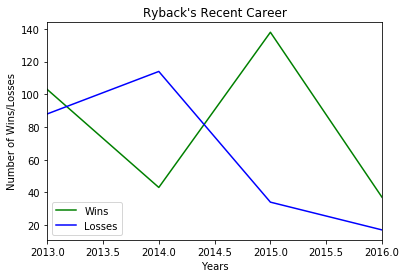

In [17]:
pd.DataFrame({
    "Wins": wins.values,
    "Losses": losses.values,
    "years": years
}).set_index("years").plot(color=["green", "blue"])

plt.legend(loc="lower left")

plt.title(wrestler + "'s Recent Career")
plt.xlabel("Years")
plt.ylabel("Number of Wins/Losses")

# Print our chart to the screen
plt.show()